In [10]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def read_pkl_data(fname):
    with open(fname, 'rb') as f:
        data_dict = pickle.load(f)
    loss_info = np.abs(data_dict['param_mean'] - data_dict['param_true'][:,None,:])
    return loss_info

In [12]:
fname_lst = [
    'data/benchmark/RUN_1/bayesian_baseline_pw-0.1_nl-5.0_Nb-200.pkl',
    'data/benchmark/RUN_2/bayesian_baseline_pw-0.1_nl-5.0_Nb-200.pkl',
    'data/benchmark/RUN_3/bayesian_baseline_pw-0.1_nl-5.0_Nb-200.pkl',
    'data/benchmark/RUN_4/bayesian_baseline_pw-0.1_nl-5.0_Nb-200.pkl',
    'data/benchmark/RUN_5/bayesian_baseline_pw-0.1_nl-5.0_Nb-200.pkl',
    'data/benchmark/RUN_1/bayesian_random_pw-0.1_nl-5.0_Nb-200.pkl',
    'data/benchmark/RUN_2/bayesian_random_pw-0.1_nl-5.0_Nb-200.pkl',
    'data/benchmark/RUN_3/bayesian_random_pw-0.1_nl-5.0_Nb-200.pkl',
    'data/benchmark/RUN_4/bayesian_random_pw-0.1_nl-5.0_Nb-200.pkl',
    'data/benchmark/RUN_5/bayesian_random_pw-0.1_nl-5.0_Nb-200.pkl',
    'data/benchmark/RUN_1/bayesian_gradientdesc_pw-0.1_nl-5.0_Nb-200.pkl',
    'data/benchmark/RUN_2/bayesian_gradientdesc_pw-0.1_nl-5.0_Nb-200.pkl',
    'data/benchmark/RUN_3/bayesian_gradientdesc_pw-0.1_nl-5.0_Nb-200.pkl',
    'data/benchmark/RUN_4/bayesian_gradientdesc_pw-0.1_nl-5.0_Nb-200.pkl',
    'data/benchmark/RUN_5/bayesian_gradientdesc_pw-0.1_nl-5.0_Nb-200.pkl'
]
fname_lst = [
    'data/benchmark/RUN_1/bayesian_baseline_pw-0.1_nl-10.0_Nb-200.pkl',
    'data/benchmark/RUN_2/bayesian_baseline_pw-0.1_nl-10.0_Nb-200.pkl',
    'data/benchmark/RUN_1/bayesian_random_pw-0.1_nl-10.0_Nb-200.pkl',
    'data/benchmark/RUN_2/bayesian_random_pw-0.1_nl-10.0_Nb-200.pkl',
    'data/benchmark/RUN_1/bayesian_gradientdesc_pw-0.1_nl-10.0_Nb-200.pkl',
    'data/benchmark/RUN_2/bayesian_gradientdesc_pw-0.1_nl-10.0_Nb-200.pkl',
]
loss_info_lst = [read_pkl_data(f) for f in fname_lst]

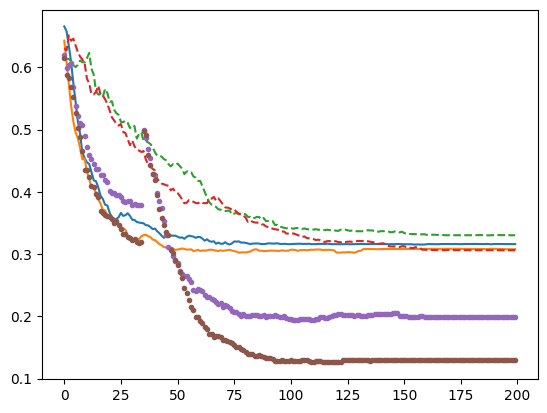

In [19]:
idx = 0
# linestyles = ['-', '-', '-', '-', '-', '--', '--', '--', '--', '--', '.', '.', '.', '.', '.']
linestyles = ['-', '-', '--', '--', '.', '.']
fig, ax = plt.subplots(1, 1)
for i, loss in enumerate(loss_info_lst):
    ax.plot(np.arange(loss.shape[1]), loss.mean(axis=0)[:,idx], linestyles[i])
    # ax.fill_between(np.arange(loss.shape[1]), 
    #     loss.mean(axis=0)[:,idx]-0.05*loss.std(axis=0)[:,idx],
    #     loss.mean(axis=0)[:,idx]+0.05*loss.std(axis=0)[:,idx], alpha=0.25)

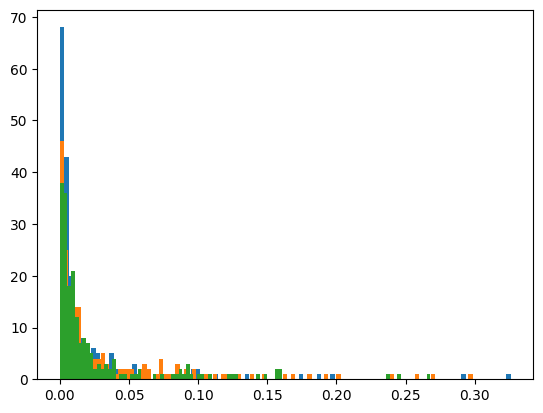

In [14]:
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(loss_info_lst[0][:,-1,idx], bins=100);
ax.hist(loss_info_lst[4][:,-1,idx], bins=100);
ax.hist(loss_info_lst[-1][:,-1,idx], bins=100);
# ax.set_xscale('log')

(-1.0, 3.0)

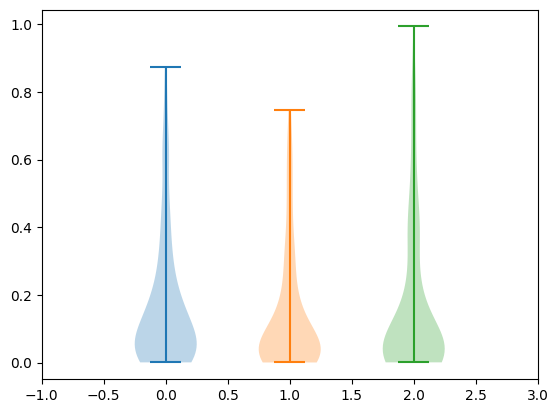

In [15]:
import seaborn as sns

idx = 1
iter_num = 10

fig = plt.figure()
ax = fig.add_subplot()
ax.violinplot(loss_info_lst[0][:,iter_num,idx], positions=[0])
ax.violinplot(loss_info_lst[4][:,iter_num,idx], positions=[1])
ax.violinplot(loss_info_lst[-1][:,iter_num,idx], positions=[2])
# sns.swarmplot(x=0*np.ones_like(loss_info_lst[0][:,iter_num,idx]), y=loss_info_lst[0][:,iter_num,idx], orient='v')
# sns.swarmplot(x=1*np.ones_like(loss_info_lst[4][:,iter_num,idx]), y=loss_info_lst[4][:,iter_num,idx], orient='v')
# sns.swarmplot(x=2*np.ones_like(loss_info_lst[-1][:,iter_num,idx]), y=loss_info_lst[-1][:,iter_num,idx], orient='v')
ax.set_xlim([-1, 3])
# ax.set_yscale('log')

In [16]:
with open('data/benchmark/bayesian_baseline_pw-0.1_nl-5.0_Nb-200.pkl', 'rb') as f:
    baseline_dict = pickle.load(f)
# with open('data/benchmark/bayesian_baseline_pw-0.1_nl-10.0_Nb-200.pkl', 'rb') as f:
#     baseline_dict_nl10 = pickle.load(f)
with open('data/benchmark/bayesian_random_pw-0.1_nl-5.0_Nb-200.pkl', 'rb') as f:
    random_dict = pickle.load(f)
with open('data/benchmark/bayesian_gradientdesc_pw-0.1_nl-5.0_Nb-200.pkl', 'rb') as f:
    gd_dict = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'data/benchmark/bayesian_baseline_pw-0.1_nl-5.0_Nb-200.pkl'

In [ ]:
l1_diff_baseline = np.abs(baseline_dict['param_mean'] - baseline_dict['param_true'][:,None,:])
# l1_diff_baseline_nl10 = np.abs(baseline_dict_nl10['param_mean'] - baseline_dict_nl10['param_true'][:,None,:])
l1_diff_random = np.abs(random_dict['param_mean'] - random_dict['param_true'][:,None,:])
l1_diff_gd = np.abs(gd_dict['param_mean'] - gd_dict['param_true'][:,None,:])

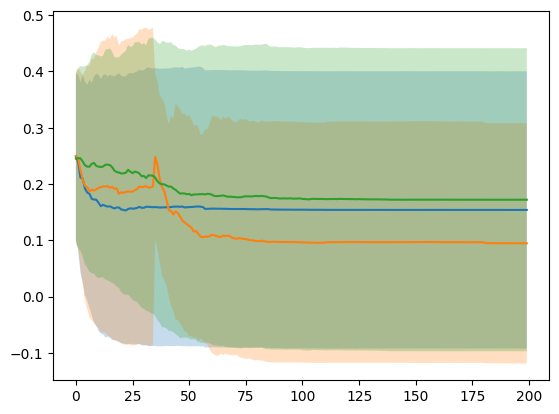

In [ ]:
idx = 1

fig, ax = plt.subplots(1, 1)
ax.plot(np.arange(l1_diff_baseline.shape[1]), l1_diff_baseline.mean(axis=0)[:,idx])
ax.fill_between(np.arange(l1_diff_baseline.shape[1]), 
    l1_diff_baseline.mean(axis=0)[:,idx]-l1_diff_baseline.std(axis=0)[:,idx],
    l1_diff_baseline.mean(axis=0)[:,idx]+l1_diff_baseline.std(axis=0)[:,idx], alpha=0.25)

# ax.plot(np.arange(l1_diff_baseline_nl10.shape[1]), l1_diff_baseline_nl10.mean(axis=0)[:,idx])
# ax.fill_between(np.arange(l1_diff_baseline_nl10.shape[1]), 
#     l1_diff_baseline_nl10.mean(axis=0)[:,idx]-l1_diff_baseline_nl10.std(axis=0)[:,idx],
#     l1_diff_baseline_nl10.mean(axis=0)[:,idx]+l1_diff_baseline_nl10.std(axis=0)[:,idx], alpha=0.25)

ax.plot(np.arange(l1_diff_gd.shape[1]), l1_diff_gd.mean(axis=0)[:,idx])
ax.fill_between(np.arange(l1_diff_gd.shape[1]), 
    l1_diff_gd.mean(axis=0)[:,idx]-l1_diff_gd.std(axis=0)[:,idx],
    l1_diff_gd.mean(axis=0)[:,idx]+l1_diff_gd.std(axis=0)[:,idx], alpha=0.25)

ax.plot(np.arange(l1_diff_random.shape[1]), l1_diff_random.mean(axis=0)[:,idx])
ax.fill_between(np.arange(l1_diff_random.shape[1]), 
    l1_diff_random.mean(axis=0)[:,idx]-l1_diff_random.std(axis=0)[:,idx],
    l1_diff_random.mean(axis=0)[:,idx]+l1_diff_random.std(axis=0)[:,idx], alpha=0.25)